<a href="https://colab.research.google.com/github/AmeenReda1/Text_classification_NADACorpus/blob/main/Text_Classification_NADACorpus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
#Text_Classification_NADACorpus


In [73]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm,preprocessing,metrics

In [74]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
dataFrame=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sampled_File_with_SMOTE.csv')
stop=stopwords.words('arabic')
print(stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل

In [75]:
dataFrame['text']=dataFrame['text'].apply(lambda line: " ".join(word for word in line.split() if word not in stop))
print(dataFrame.head())
print(len(dataFrame['text']))
dataFrame.drop_duplicates(subset ="text",
                     keep = 'first', inplace = True)
print(len(dataFrame['text']))

                                                text                     class
0  'غالبيت اصول اعمال باقرب ست رحب دولار اختصارا ...  'الإقتصاد-علوم اجتماعية'
1  'اضافت اخير بنك دول مال رئيس اعمال يقلص افق لا...  'الإقتصاد-علوم اجتماعية'
2  'مستقره اضافت اخير دول اتفاق اعمال يقلص افق لا...  'الإقتصاد-علوم اجتماعية'
3  'اوسط سرق بنك عاما ثان متحده مخبرا لملا الفضول...  'الإقتصاد-علوم اجتماعية'
4  'اوسط اطول عاما ثان متحده بان مخبرا لملا اعمال...  'الإقتصاد-علوم اجتماعية'
13066
5745


In [76]:
train_x, valid_x, train_y, valid_y = train_test_split(dataFrame['text'], dataFrame['class'],test_size=0.2)
print(len(set(train_y)))
print(len(set(valid_y)))
before_encode_valid_y=dataFrame['class'].unique()
print('before_encode: ',before_encode_valid_y)
# TFIDF feature generation for a maximum of 5000 features
print("vaild X",valid_x.head())
print("vaild X",valid_y.head())
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
tfidf_vect = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}', max_features=5000)
print(tfidf_vect)
tfidf_vect.fit(dataFrame['text'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)
print(xtrain_tfidf.data)

10
10
before_encode:  ["'الإقتصاد-علوم اجتماعية'" "'الأدب العربي-أدبيات'" 'رياضة'
 "'علوم صحية-علوم تطبيقية'" "'السياسة-علوم اجتماعية'"
 "'القانون-علوم اجتماعية'" 'عام-اسلام-ديانات' "'علم الكمبيوتر-علوم بحتة'"
 "'عام- فنون'" "'فلك-علوم بحتة'"]
vaild X 7011    'تابع تكثر انبياء اطباء طبيعت بحث رئيس زوج رحم...
763     'اوسط حديد مشروع طول باسطنبول امال طهر اوروبا ...
6985    'يغلب لموقع اتجا قدر رعايت يتشكل ان حنبل معن م...
303     'احد جلس خسر قفز منازل اكبر موج اعل قيمت خدم و...
1886    'قرر شاب باسم عبد معط تسلل امريكا بطريق شرع فو...
Name: text, dtype: object
vaild X 7011            عام-اسلام-ديانات
763     'الإقتصاد-علوم اجتماعية'
6985            عام-اسلام-ديانات
303     'الإقتصاد-علوم اجتماعية'
1886       'الأدب العربي-أدبيات'
Name: class, dtype: object
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                m

In [77]:
def train_model(classifier, feature_vector_train, label,feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    return metrics.accuracy_score(predictions, valid_y),predictions

In [78]:
clf = svm.SVC(kernel='linear')
#train_model
accuracy,predictions=train_model(clf,xtrain_tfidf, train_y, xvalid_tfidf)
print("accuracy: ",accuracy*100)

accuracy:  98.43342036553526


In [79]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(valid_y,predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.98      0.98      0.98       253
           2       0.89      0.89      0.89        19
           3       0.97      0.99      0.98       253
           4       1.00      1.00      1.00        61
           5       0.96      0.99      0.97        71
           6       1.00      1.00      1.00        66
           7       1.00      0.99      0.99        68
           8       1.00      1.00      1.00       212
           9       0.98      0.97      0.97        93

    accuracy                           0.98      1149
   macro avg       0.98      0.98      0.98      1149
weighted avg       0.98      0.98      0.98      1149



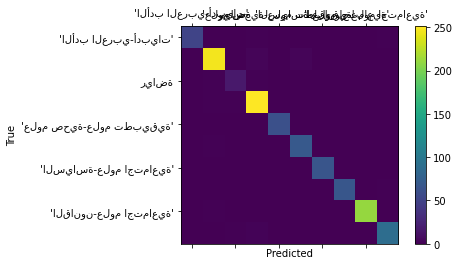

In [80]:
from sklearn.metrics import confusion_matrix

labels = before_encode_valid_y
cm = confusion_matrix(valid_y, predictions)
# print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
#plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [90]:
import re
import string
thesample='Arabic‬ - ‮رياضة‬ - ‮تذاكر مجانية لكأس العالم 2010 ‬ الاتحاد الدولي لكرة القدم (فيفا) يفتح رصيدا لتمويل 120 ألف تذكرة مجانية تخصص لفقراء جنوب إفريقيا لحضور مباريات كأس العالم في العام المقبل. الرئيسية الشرق الأوسط العالم شارك برأيك اقتصاد وأعمال منوعات علوم وتكنولوجيا رياضة hi راديو وتلفزيون آخر تحديث:  السبت, 15 أغسطس/ آب, 2009, 17:29 GMT تذاكر مجانية لكأس العالم 2010 فتح الاتحاد الدولي لكرة القدم (فيفا) رصيدا لتمويل 120 ألف تذكرة مجانية تخصص لفقراء جنوب إفريقيا لحضور مباريات كأس العالم في العام المقبل. وستُمنح التذاكر لكل المنخرطين في التنمية الاجتماعية في جنوب أفريقيا مكافأة لهم على ما "يبذلونه من جهد". وكان الفيفا قد قرر عرض تذاكر منخفضة السعر لصالح الجنوب أفريقيين تبدأ من 17 دولارا، علما بأن سعر التذكرة الدولي يبدأ من 80 دولارا. لكن مع بلوغ معدل البطالة في أفريقيا الجنوبية ربع السكان القادرين على العمل، وانخفاض نسبة الأجور التي قد لا تتجاوز 10 دولارات لليوم، حتى المقاعد رخيصة الثمن قد لا تكون في المتناول. وخُصصت 40 ألف تذكرة لعمال البناء الذين يعملون في تشييد الملاعب. ونصح المسؤولون على تنظيم الحدث الكروي في جنوب إفريقيا كل من له الاستطاعة بشراء التذاكر، لأن المجانية منها "مخصصة لشريحة محدودة منهم". '
def clean_samples(text):
  pattern = r'[0-9]'
  pattern2='r[^\w\s]'
# Match all digits in the string and replace them with an empty string
  new_string = re.sub(r'[0-9]', '', text)
  new_string=re.sub(r'[^\w\s]','',new_string)
  new_string = "".join([char for char in new_string if char not in string.ascii_letters]).strip()
  return new_string.strip()
text_clean=clean_samples(thesample)
print(text_clean)

رياضة  تذاكر مجانية لكأس العالم   الاتحاد الدولي لكرة القدم فيفا يفتح رصيدا لتمويل  ألف تذكرة مجانية تخصص لفقراء جنوب إفريقيا لحضور مباريات كأس العالم في العام المقبل الرئيسية الشرق الأوسط العالم شارك برأيك اقتصاد وأعمال منوعات علوم وتكنولوجيا رياضة  راديو وتلفزيون آخر تحديث  السبت  أغسطس آب    تذاكر مجانية لكأس العالم  فتح الاتحاد الدولي لكرة القدم فيفا رصيدا لتمويل  ألف تذكرة مجانية تخصص لفقراء جنوب إفريقيا لحضور مباريات كأس العالم في العام المقبل وستمنح التذاكر لكل المنخرطين في التنمية الاجتماعية في جنوب أفريقيا مكافأة لهم على ما يبذلونه من جهد وكان الفيفا قد قرر عرض تذاكر منخفضة السعر لصالح الجنوب أفريقيين تبدأ من  دولارا علما بأن سعر التذكرة الدولي يبدأ من  دولارا لكن مع بلوغ معدل البطالة في أفريقيا الجنوبية ربع السكان القادرين على العمل وانخفاض نسبة الأجور التي قد لا تتجاوز  دولارات لليوم حتى المقاعد رخيصة الثمن قد لا تكون في المتناول وخصصت  ألف تذكرة لعمال البناء الذين يعملون في تشييد الملاعب ونصح المسؤولون على تنظيم الحدث الكروي في جنوب إفريقيا كل من له الاستطاعة بشراء التذاكر 

In [100]:
import numpy as np
def convert_sample_to_numbers(text):
  text_result=tfidf_vect.transform([text])
  return text_result
tokens=convert_sample_to_numbers(thesample)

c=clf.predict(np.array(tokens[-1]))    

ValueError: ignored